In [10]:
import os
from progressbar import ProgressBar
from algorithm.algorithms_known_parameter import * 
from bandit_process.arm_generator_with_parameter import *
from matplotlib import pyplot as plt

In [8]:
a=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)

In [9]:
a.variance

5

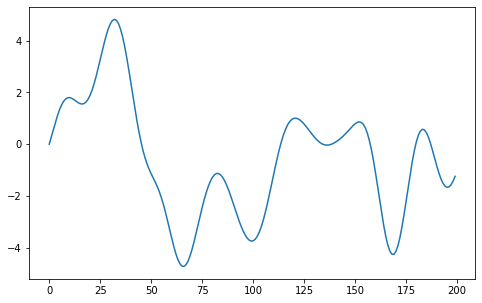

In [4]:
temp1 = a.arm_path
plt.plot(temp1)

In [5]:
rewards=a.reward_path()
rewards = rewards.reshape(-1)
rewards.shape

(200,)

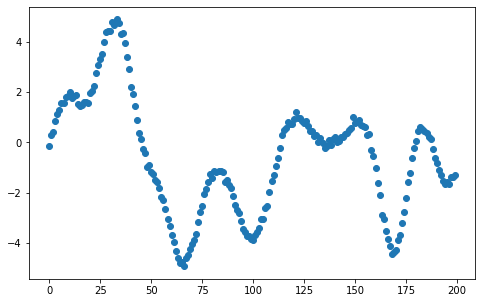

In [6]:
plt.scatter(np.array(range(200)),rewards)

In [13]:
rewards.shape

(200,)

In [8]:
noise = np.random.normal(0,0.1,200)

In [10]:
noise.shape

(200,)

In [32]:
holder=np.zeros(5000)
for i in range(5000):
    holder[i]=np.random.randint(0,4)

In [36]:
len(holder[holder==2])/5000

0.2474

In [38]:
path0 = [0,5,5,0,0,0]
path1 =  [1,0,0,10,10,10]
path2 = [20,0,0,40,0,0]
res = Assembly_Line_Scheduling(0,0,path0,path1,path2)

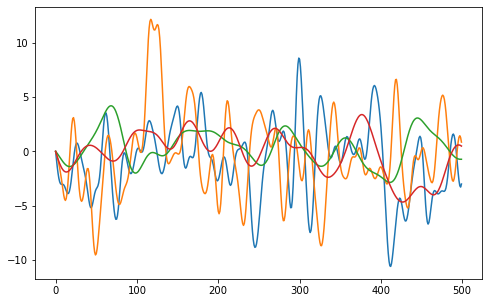

In [11]:
arm1=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=500)
arm2=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=500)
arm3=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=500)
arm4=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=500)


plt.plot(arm1.arm_path)
plt.plot(arm2.arm_path)
plt.plot(arm3.arm_path)
plt.plot(arm4.arm_path)

In [2]:
C_holder = [0]

In [5]:
for C in C_holder:
  
  regret_DPTS = []
  regret_DPPM = []

  N = 250
  T = 200
  
  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):


    arm1=GP_Arm(lengthscale=8, variance=5,sigma=0.1, T=200)
    arm2=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)
 
    regret_holder1,_ = general_DPTS(C,1,arm1,arm2) #DPTS
    regret_holder2,_ = general_DPTS(C,0,arm1,arm2) #DPPM
    

    regret_DPTS.append(regret_holder1)
    regret_DPPM.append(regret_holder2)
    

  regret_record1 = np.array(regret_DPTS).reshape(N,T)
  regret_record2 = np.array(regret_DPPM).reshape(N,T)


  np.savetxt('new_regret_DPTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  np.savetxt('new_regret_DPPM_cost'+str(C)+'.csv', regret_record2, delimiter=',')


100% |########################################################################|


In [9]:
C_holder = [150]

In [10]:
for C in C_holder:
  
  regret_DPTS = []
  regret_DPPM = []
  
  choice_DPTS = []
  choice_DPPM = []

  N = 250
  T = 400
  
  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):


    arm1=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
    arm2=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
    arm3=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
    arm4=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
 
    regret_holder1,choice_holder1 = general_DPTS(C,1,arm1,arm2,arm3,arm4)
    regret_holder2,choice_holder2 = general_DPTS(C,0,arm1,arm2,arm3,arm4)
    

    regret_DPTS.append(regret_holder1)
    regret_DPPM.append(regret_holder2)
    choice_DPTS.append(choice_holder1)
    choice_DPPM.append(choice_holder2)
    
    

  regret_record1 = np.array(regret_DPTS).reshape(N,T)
  regret_record2 = np.array(regret_DPPM).reshape(N,T)
  
  choice_DPTS = np.array(choice_DPTS)
  choice_DPPM = np.array(choice_DPPM)

  

  np.savetxt('4arms_regret_DPTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  np.savetxt('4arms_regret_DPPM_cost'+str(C)+'.csv', regret_record2, delimiter=',')
  np.savetxt('4arms_choice_DPTS_cost'+str(C)+'.csv', choice_DPTS, delimiter=',')
  np.savetxt('4arms_choice_DPPM_cost'+str(C)+'.csv', choice_DPPM, delimiter=',')


100% |########################################################################|


In [26]:
T=400
regret_record1 = np.array(regret_DPTS).reshape(N,T)
regret_record2 = np.array(regret_DPPM).reshape(N,T)

In [ ]:
regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0')
plt.legend()

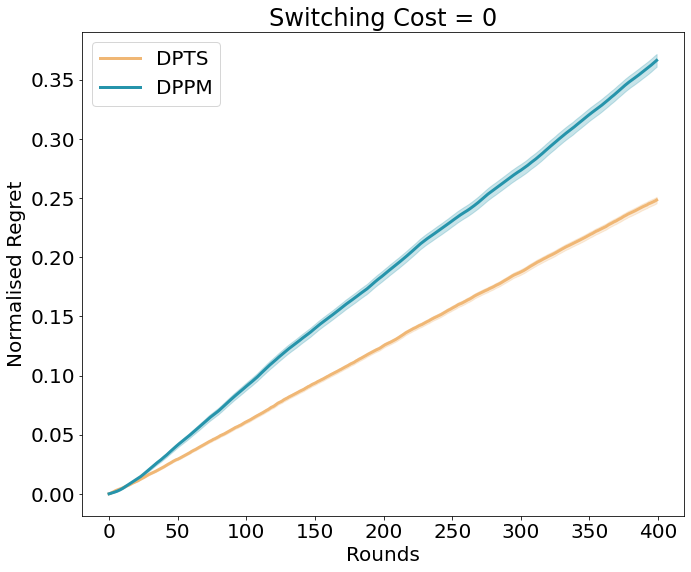

In [27]:
regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0')
plt.legend()
plt.savefig('new_SC1.5_cc.png')

In [28]:
choice_DPTS = np.array(choice_DPTS)
choice_DPPM = np.array(choice_DPPM)

In [32]:
np.savetxt('4arms_choice_DPTS_cost'+str(C)+'.csv', choice_DPTS, delimiter=',')
np.savetxt('4arms_choice_DPPM_cost'+str(C)+'.csv', choice_DPPM, delimiter=',')

In [29]:
choice_DPPM

array([[0, 0, 0, ..., 3, 3, 3],
       [3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 2, 2, 2],
       [1, 0, 2, ..., 3, 3, 3],
       [1, 0, 2, ..., 1, 1, 1]])

In [30]:
cost_holder = [0]

print('The result of DPTS: ')
for C in cost_holder:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPTS==2)+np.mean(choice_DPTS==3)}')

The result of DPTS: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.37678999999999996


In [31]:
cost_holder = [0]

print('The result of DPPM: ')
for C in cost_holder:
    print(f'when the switching cost is {C}, the percentage of arm 3 and arm 4 is {np.mean(choice_DPPM==2)+np.mean(choice_DPPM==3)}')

The result of DPPM: 
when the switching cost is 0, the percentage of arm 3 and arm 4 is 0.62495


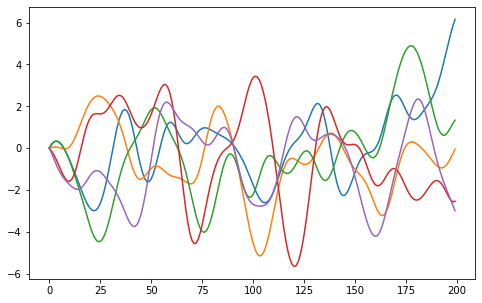

In [8]:
for exp in range(5):

    T=200

    arm1=GP_Arm(lengthscale=8, variance=5,sigma=0.1, T=200)
    arm2=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)
    
    plt.plot(arm1.arm_path)

In [51]:
C_holder = [0]

In [52]:
for C in C_holder:
  
  regret_DPTS = []
  choice_DPTS = []


  N = 250
  T = 400
  
  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):


    arm1=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
    arm2=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
    arm3=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
    arm4=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
 
    regret_holder1,choice_holder1 = simulation_DPTS(C,1, arm1,arm2,arm3,arm4)
    
    

    regret_DPTS.append(regret_holder1)
    choice_DPTS.append(choice_holder1)
  
    
    

  regret_record1 = np.array(regret_DPTS).reshape(N,T)
  choice_DPTS = np.array(choice_DPTS)


  

  # np.savetxt('simulation_4arms_regret_DPTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  # np.savetxt('simulation_4arms_choice_DPTS_cost'+str(C)+'.csv', choice_DPTS, delimiter=',')


100% |########################################################################|


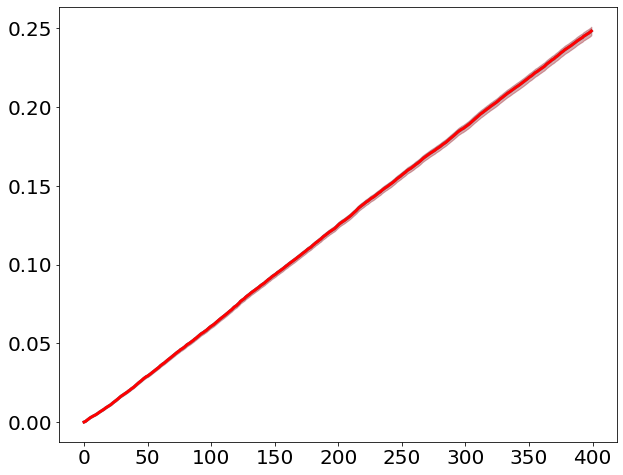

In [55]:
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost0.csv'), delimiter=',')
regret_cumsum2=np.cumsum(regret_record2,axis=1)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(250)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)


regret_cumsum1=np.cumsum(regret_record1,axis=1)
cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(250)


plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='red')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='red', alpha=0.25)

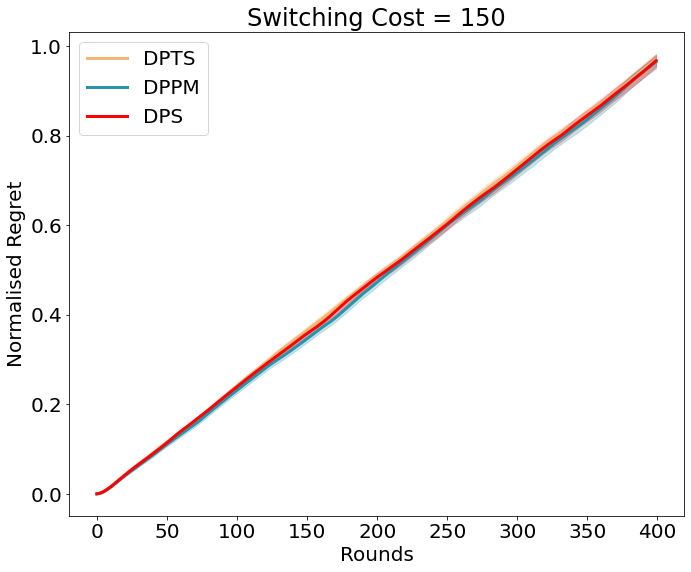

In [12]:
regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'4arms_regret_DPTS_cost150.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'4arms_regret_DPPM_cost150.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'simulation_4arms_regret_DPTS_cost150.csv'), delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)



cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)


cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(250)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(250)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(250)


plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='DPS',color='red',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, color='red',alpha=0.25)



plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 150')
plt.legend()
#plt.savefig('simulation_4arms_SC1.5.png')

In [50]:
aa = np.zeros(250)
for i in range(250):
  aa[i] = np.random.randint(0,4)
  
np.mean((aa==2)+(aa==3))
     

0.488

In [16]:
np.mean((aa==2)+(aa==3))

0.488

In [6]:
C_holder = [5]

In [7]:
for C in C_holder:
  
  regret_DPTS = []
  choice_DPTS = []


  N = 25
  T = 400
  
  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):


    arm1=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
    arm2=GP_Arm(lengthscale=6, variance=15,sigma=0.1, T=400)
    arm3=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
    arm4=GP_Arm(lengthscale=18, variance=4,sigma=0.1, T=400)
 
    regret_holder1,choice_holder1 = simulation_DPTS_VF(C,25, arm1,arm2,arm3,arm4)
    
    

    regret_DPTS.append(regret_holder1)
    choice_DPTS.append(choice_holder1)
  
    
    

  regret_record4 = np.array(regret_DPTS).reshape(N,T)
  choice_DPTS = np.array(choice_DPTS)


  

  # np.savetxt('simulation_4arms_regret_DPTS_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  # np.savetxt('simulation_4arms_choice_DPTS_cost'+str(C)+'.csv', choice_DPTS, delimiter=',')

100% |########################################################################|


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


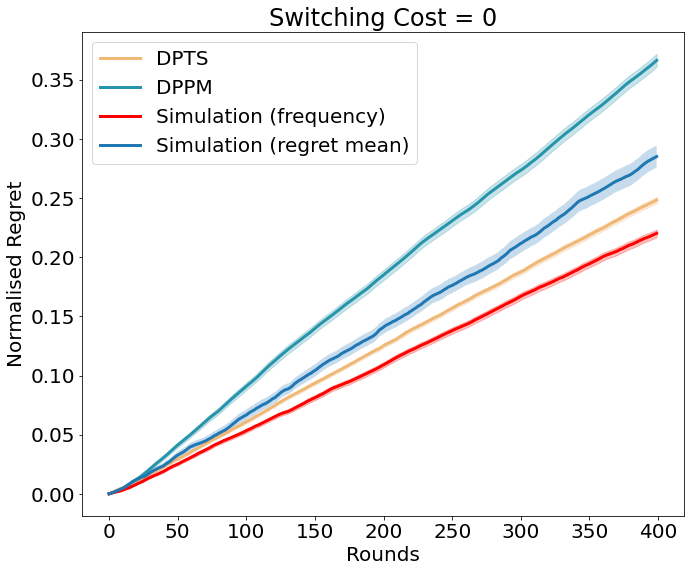

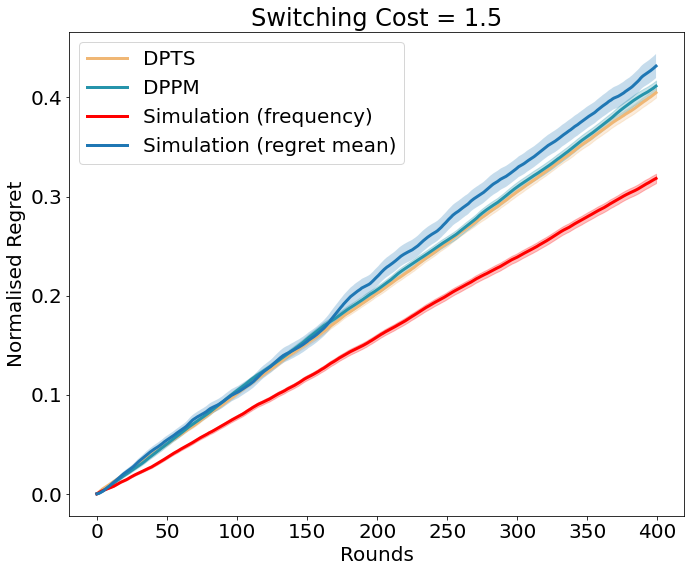

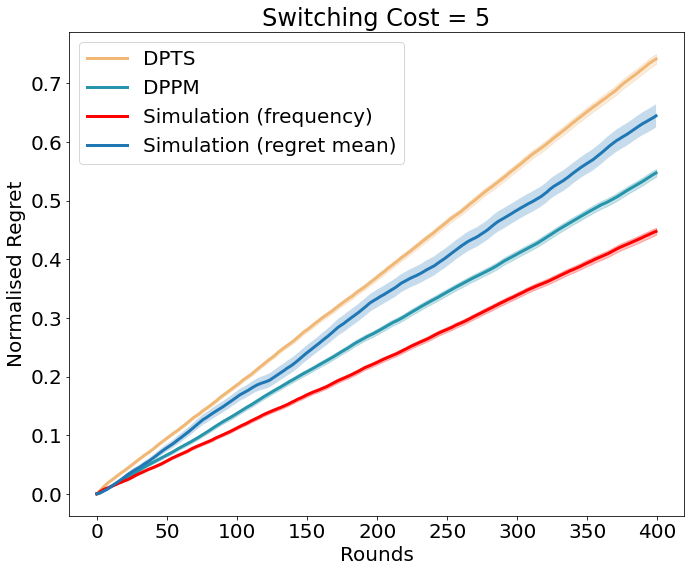

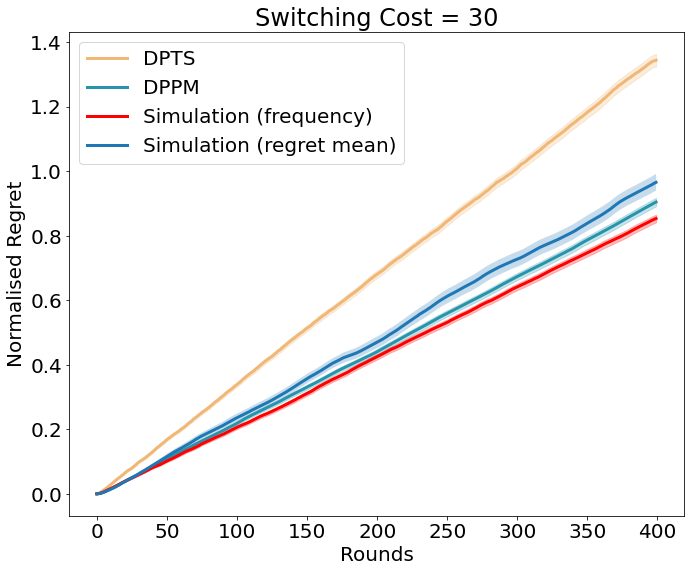

In [12]:
N = 250
T = 400
cost_holder = [0,1.5,5,30]

for C in cost_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/4arms_regret_DPPM_cost'+str(C)+'.csv'), delimiter=',')
    regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/simulation_4arms_regret_DPTS_cost'+str(C)+'.csv'), delimiter=',')
    regret_record4 = np.genfromtxt(os.path.join(os.getcwd(),'new_result/simulationVF_4arms_regret_DPTS_cost'+str(C)+'.csv'), delimiter=',')


    regret_cumsum1=np.cumsum(regret_record1,axis=1)
    regret_cumsum2=np.cumsum(regret_record2,axis=1)
    regret_cumsum3=np.cumsum(regret_record3,axis=1)
    regret_cumsum4=np.cumsum(regret_record4,axis=1)



    cumsum_average1=np.mean(regret_cumsum1,axis=0)
    cumsum_average2=np.mean(regret_cumsum2,axis=0)
    cumsum_average3=np.mean(regret_cumsum3,axis=0)
    cumsum_average4=np.mean(regret_cumsum4,axis=0)


    cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
    cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
    cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)
    cumsum_std4=np.sqrt(np.var(regret_cumsum4,axis=0))/math.sqrt(50)


    plt.rcParams['font.size'] = '20'
    plt.rc('font', family='Times New Roman')
    plt.figure(figsize=(10, 8))

    plt.plot(cumsum_average1,color='#F0B775' ,linewidth=3,label='DPTS')
    plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color= '#F0B775', alpha=0.25)

    plt.plot(cumsum_average2,label='DPPM',linewidth=3,color='#2694ab')
    plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

    plt.plot(cumsum_average3,label='Simulation (frequency)',color='red',linewidth=3)
    plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, color='red',alpha=0.25)
    
    plt.plot(cumsum_average4,label='Simulation (regret mean)',linewidth=3)
    plt.fill_between(range(T), cumsum_average4-cumsum_std4, cumsum_average4+cumsum_std4,alpha=0.25)



    plt.xlabel('Rounds',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    plt.tight_layout()
    plt.title('Switching Cost = '+str(C))
    plt.legend()
  

In [5]:
C_holder = [0,0.25,0.75,1.5,5]

for C in C_holder:
  
  regret_DPS_s5 = []
  choice_DPS_s5 = []
  regret_DPS_s10 = []
  choice_DPS_s10 = []
  regret_DPS_s25 = []
  choice_DPS_s25 = []
  regret_DPTS = []
  choice_DPTS = []
  regret_DPPM = []
  choice_DPPM = []


  N = 1
  T = 200
  
  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):


    
    arm1=GP_Arm(lengthscale=8, variance=5,sigma=0.1, T=200)
    arm2=GP_Arm(lengthscale=10, variance=5,sigma=0.1, T=200)
 
    regret_holder1,choice_holder1 = simulation_DPTS(C,5, arm1,arm2)
    regret_holder2,choice_holder2 = simulation_DPTS(C,10, arm1,arm2)
    regret_holder3,choice_holder3 = simulation_DPTS(C,25, arm1,arm2)
    regret_holder4,choice_holder4= general_DPTS(C,1,arm1,arm2) #DPTS
    regret_holder5,choice_holder5 = general_DPTS(C,0,arm1,arm2) #DPPM
    
    

    regret_DPS_s5.append(regret_holder1)
    choice_DPS_s5.append(choice_holder1)
    regret_DPS_s10.append(regret_holder2)
    choice_DPS_s10.append(choice_holder2)
    regret_DPS_s25.append(regret_holder3)
    choice_DPS_s25.append(choice_holder3)
    regret_DPTS.append(regret_holder4)
    choice_DPTS.append(choice_holder4)
    regret_DPPM.append(regret_holder5)
    choice_DPPM.append(choice_holder5)
  
    

  regret_DPS_s5 = np.array(regret_DPS_s5).reshape(N,T)
  choice_DPS_s5 = np.array(choice_DPS_s5)
  regret_DPS_s10 = np.array(regret_DPS_s10).reshape(N,T)
  choice_DPS_s10 = np.array(choice_DPS_s10)
  regret_DPS_s25 = np.array(regret_DPS_s25).reshape(N,T)
  choice_DPS_s25 = np.array(choice_DPS_s25)
  regret_DPTS = np.array(regret_DPTS).reshape(N,T)
  choice_DPTS = np.array(choice_DPTS)
  regret_DPPM = np.array(regret_DPPM).reshape(N,T)
  choice_DPPM = np.array(choice_DPPM)
 

  np.savetxt('2 arm experiments/simulation_2arms_regret_DPS_s5_cost'+str(C)+'.csv', regret_DPS_s5, delimiter=',')
  np.savetxt('2 arm experiments/simulation_2arms_choice_DPS_s5_cost'+str(C)+'.csv', choice_DPS_s5, delimiter=',')
  np.savetxt('2 arm experiments/simulation_2arms_regret_DPS_s10_cost'+str(C)+'.csv', regret_DPS_s10, delimiter=',')
  np.savetxt('2 arm experiments/simulation_2arms_choice_DPS_s10_cost'+str(C)+'.csv', choice_DPS_s10, delimiter=',')
  np.savetxt('2 arm experiments/simulation_2arms_regret_DPS_s25_cost'+str(C)+'.csv', regret_DPS_s25, delimiter=',')
  np.savetxt('2 arm experiments/simulation_2arms_choice_DPS_s25_cost'+str(C)+'.csv', choice_DPS_s25, delimiter=',')
  np.savetxt('2 arm experiments/2arms_regret_DPTS_cost'+str(C)+'.csv', regret_DPTS, delimiter=',')
  np.savetxt('2 arm experiments/2arms_choice_DPTS_cost'+str(C)+'.csv', choice_DPTS, delimiter=',')
  np.savetxt('2 arm experiments/2arms_regret_DPPM_cost'+str(C)+'.csv', regret_DPPM, delimiter=',')
  np.savetxt('2 arm experiments/2arms_choice_DPPM_cost'+str(C)+'.csv', choice_DPPM, delimiter=',')

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
